# It's Day 1.5 and I know (almost) nothing: Bootcamp Part II

Welcome to Part II of the bootcamp! Now that we've covered the basics, we can start diving into what makes programming useful and powerful. To begin, let's quickly review what we learned in Part I of this tutorial. *Note: You'll need to run all code cells of this tutorial in order.*

### Variable Declarations
We learned that to store information (of any kind) in Python, we want to set a variable name equal to that information, and then use that name to perform calculations on it 

### Data Types
We learned that Python has different rules for different kinds of data — it performs calculations differently on integers than on floats, treats lists differently than numpy arrays, etc. Figuring out what data type is the most efficient and effective way to work with your data is one of the key conceptual skills to learn when programming. 

### Lists and Indexing
We learned that the "default" way to store simple data (say, a bunch of numbers) is in a **list**, which can then be **indexed** by element number (starting with zero) to extract values from the list. We learned that lists can be fed into certain functions, like sum(), to return the sum of all numbers in the list (assuming the list is, indeed, all numbers). 

### Debugging (barely)
You probably didn't notice, but we practiced a little bit of debugging as well — we printed out lists to make sure they were filled with the numbers we wanted after a calculation, a simple form of debugging! 

## What we will cover in Part II 
By the end of this tutorial, I hope you will be able to handle the first task a professor might give you when starting to do research with them — loading up some data from a simple ASCII file, performing some calculations, and plotting it. To do all this, we will need to learn a bit of the Numpy Library, some **conditional statements** and **loops**, and some basic plotting techniques. Without further ado, let's jump in! 

### Numpy, Scipy, Matplotlib, and Beyond
In Part I of this tutorial, we had to resort to calling a special data type that was not native to Python — the Numpy Array. This was useful to us because of a special behavior: Operating math on an array performs the operation on each value in the array, useful for say, subtracting the mean from every value and then squaring every value. 

But what *is* Numpy, actually? 

Believe it or not, from a mathematical perspective, what you saw in Part I was just about the limit of Python's native math functionality. You can add, subtract, multiply, exponentiate, and take modulos. To do anything more complicated — like, say, calculate a sine or cosine, we need to actually **import** libraries of functions which can accomplish these tasks. 

#### What's a function? 
It's useful to take a second to make sure we're on the same page about functions. A function is something that takes one or more inputs, and spits something out. When, in math class, you write y = sin(x), "sin" is the function you are using. The "x" you are plugging in is the *argument* of that function, and you are storing its *output* in the variable "y". If I use the range() function, to create a list from 1 to 10, 

In [3]:
y = list(range(1,11))
print(y)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


Then "1" and "11" are arguments to the range function, and it's output is stored in "y". Note that print() is also a function — it takes in the argument "y" and spits out its value onto the screen. 

Back to the task at hand. If I want to calculate the sine of a number, $x$, I can't do that in native Python. But luckily, many clever people have crafted libraries of functions which can. 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Okay, so to use these libraries of functions, I have to **import** them into my code, as I have above. Notice that I could just "import numpy" as well — but Python lets you give the library a "nickname" shorthand so that in your code, you don't have to type out "numpy" every time. In other libraries, you can choose whatever you want, but generally, numpy is imported as np and matplotlib.pyplot (a subset of matplotlib with the plotting commands we'll be using) as plt. Don't worry about the "inline" — it's just required to make plots appear in this notebook rather than a separate window.

Now, I can create my sine:

In [5]:
x = np.linspace(0,10,100)
y = np.sin(x)

Woah! New function alert! I also just used np.linspace(), a function which, unlike range (which has you pick a start and stop and advances by integer (or multiples) steps in between),  lets you pick a start, a stop, and a number of subdivisions, and then will try to space them evenly. Read it as "give me an array from 0 to 10 with 100 evenly spaced points." Read line two as "Give me an array that contains the sine of each value in the x array." 

Now let's whip out our plotting:

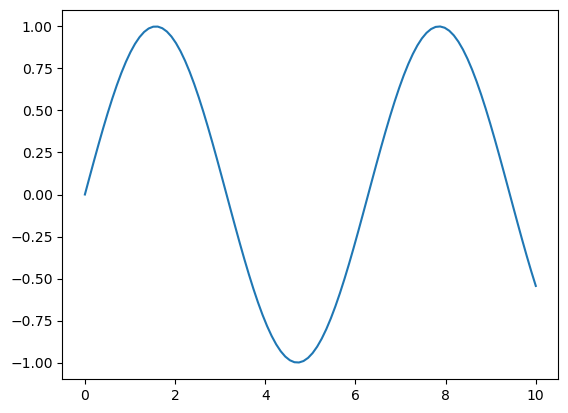

In [6]:
plt.plot(x,y)

The above is the absolute barebones you can plot: $x$ against $y$. We'll get into fancier plotting techniques a bit later. 

## Loading Data from a File
It's day 1 of your new research assignment. You've just met with the professor or post-doc. They've probably given you like 10,000 papers to read (skim). They might also have given you a file or two of data, and told you to "familiarize" yourself with the format, get it into Python, and make some plots. 

This is what we are going to learn to do now. 

### Loadtxt() and Genfromtxt()
Astronomical data are stored in a huge variety of file formats and organizational schemes. Let's start with the most simple and build up. In Ye Olde Days, basically all data were kept in plaintext ASCII files — in short, text. Things have changed recently, though often times data tables are still the most efficient means of storage, they are now wrapped inside file formats like FITS and HDF5 to make them more portable and stable over time. At the end of the day, we are most interested in getting past those layers of protocols to the raw numbers underneath, which we want sitting around in arrays we can mess with. 

Let's start with that most simple of cases: The ASCII text file. 
From the dependencies, you should have downloaded the "quantum_mechanics.grades" file from the website. *Note:* Often, when working with ascii, programmers will set up their programs to output text files with extensions that indicate what they are (like data.spec and data.phot), rather than .txt — but rest assured, they are all text files and can be viewed in a text viewer like Sublime. 

Make sure that the text file is in the same directory you are running this notebook in. Your first task: Look up the **documentation** for Numpy's loadtxt() function — you can do so online (google the function) or by typing help(np.loadtxt) in a cell here in this Notebook. Once you've done that, use the cell below to load the data into a variable called class_grades. We're going to continue with our dataset from Part I.

The file you are loading contains 2 columns, the first is the name of the student, the second is their grade on the exam. If you just try to run np.loadtxt() on the file, you'll get an error, because it cannot turn the names into floats. Make sure to look at the "dtype" option in the documentation, and try setting it to string — this will turn all things into strings, but we can extract the numbers easily later.

In [7]:
class_grades = np.loadtxt('filename.grades')

FileNotFoundError: filename.grades not found.

In the cell below, once you get it to load without throwing an error, print the array to see what it looks like. 

In [ ]:
class_grades

Take a closer look at the printed array. Notice how there are outer brackets surrounding a bunch of bracketed pairs? In the cell below, index the array for it's 0th element and see what happens:

In [ ]:
#code here

You should get the first ordered pair out — Sam, and his grade of 100. What happens if you index *that* mini-array for it's 1st element? Do that below:

In [ ]:
#code here

You should get the string "100". In the cell below, try to use the "typecasting" function we learned in Part I to convert the string "100" into a float. No need to save it into a variable, just try the command and see that it returns 100 without the string symbols:

In [ ]:
#code here

So now we are starting to see a methodology for extracting the numbers out of the strings. Our next step is going to be creating a dictionary containing the student names as "keys" and the student scores as "values." But for that, we are going to use a **for-loop**. 

### For-Loops
There are two primary looping methods in Python: For-loops and While-loops. We'll focus on For-loops for a second. 

A For-loop allows you to specify what's known as an iterator — usually an increasing array of indices — which let's you run a block of code over and over again under slightly different circumstances. For example, what if we wanted to advance through our class_grades array, and on a new line each time, print the name of each student. I could do that with the following:

In [10]:
for i in class_grades:
    print(i[0])


Sam
Joe
Priya
Minh
Sarah
Shivani
Alex
Celeste
Kaitlyn
Andrew
Dhruv
Wren
Melanie
Caroline
Roger
Dick
Mariah
Josiah
Malena
Steven
Stephanie
Riya
Jose
Ahmed
Mariska
Tom
Isaac
Letty
Emily
Peter
Arie
Michael
Bahar
Jasmine
Vega
Samantha
Nick
Nikoo
Leo
Madeline
Caragh
Grace
Arjun
Sahana
Nils
Isabel
Adam
Pauline
Paul
Trevor
Allyn
Cedric
Christine
Derek
Divya
Gibson
Justin
Kelly
Kaley
Kiara
Levi
Luis
Sanni
Sean
Nikoo


OK, so what just happened? By saying "For i in class grades," I was telling the computer that class_grades was a container with multiple "things" in it (those ordered pairs we saw earlier). I told it "Hey, for every "thing" in class grades, print out that "thing" indexed at 0." 

Notice that this worked because I, the programmer, knew that not only was class_grades something that could be advanced through, but that the subparts of class_grades themselves had subparts to be indexed. If I had said print(i[2]) I would've gotten an error, because we know each mini-array in class_grades has only a 0th and 1st element. 

Let's see another example. Remember the range() function? I can use that as a iterator as well:

In [11]:
for i in range(10):
    print('My age is: {}'.format(i))

My age is: 0
My age is: 1
My age is: 2
My age is: 3
My age is: 4
My age is: 5
My age is: 6
My age is: 7
My age is: 8
My age is: 9


Remember, range(10) can be treated as its output, which is [0,1,2,3,4,5,6,7,8,9]. You could, to see it more clearly, say:

In [12]:
thing_to_loop_over = range(10)
for thing in thing_to_loop_over:
    print('My age is: {}'.format(thing))

My age is: 0
My age is: 1
My age is: 2
My age is: 3
My age is: 4
My age is: 5
My age is: 6
My age is: 7
My age is: 8
My age is: 9


I'm also highlighting here that while "i" is a standard choice for an outer loop iterating variable name (followed by "j" and "k"), you can use whatever you want as long as it's consistent in the loop. 

I can also use loops to fill an empty array with values, e.g.

In [13]:
to_fill = []
for i in class_grades: #check the length of class_grades, and create a counting array that long
    to_fill.append(float(i[1]))
print(to_fill)

[100.0, 68.0, 40.0, 78.0, 81.0, 65.0, 39.0, 118.0, 46.0, 78.0, 9.0, 37.0, 43.0, 87.0, 54.0, 29.0, 95.0, 87.0, 111.0, 65.0, 43.0, 53.0, 47.0, 16.0, 98.0, 82.0, 58.0, 5.0, 49.0, 67.0, 60.0, 76.0, 16.0, 111.0, 65.0, 61.0, 73.0, 63.0, 115.0, 72.0, 76.0, 48.0, 75.0, 101.0, 45.0, 46.0, 82.0, 57.0, 17.0, 88.0, 90.0, 53.0, 32.0, 28.0, 50.0, 91.0, 93.0, 7.0, 63.0, 88.0, 55.0, 37.0, 67.0, 0.0, 79.0]


What I've done here is make a list containing all the scores, as floats! For each item in class grades, I first take the 1st element (the i[1] part), then I force it to be a float (this wouldn't work if they weren't numbers in the strings), then I **appended** that value to the empty to_fill array outside. Appending to lists is easy, as shown, as a *method* of lists. So to add anything to the end of a list, you just write list_name.append(thing_to_add). 

### Exercise 1: A dictionary of student names / scores
OK, it's time for you to dive in! Once you've gotten the hang of the above, and maybe played around a bit with it, try the following. 

In the cell block below, define an empty dictionary called class_dictionary. Then, initialize a for-loop that goes through the class_grades array, and puts each student name (as a string) as a key, and their score (as a float) as a value. 

You can set new values in a dictionary even easier than appending, simply use 

dictionary_name['new key'] = new value

*Note: Here all our keys are strings, and this is often the use-case for dictionaries, but it is not required. You can make dictionaries whose keys are, for example, integers. 

In [ ]:
#code here

Does it look like it worked? Try indexing for the grade of Peter in the cell below:

In [ ]:
#code here

Did you get 67.0? 

Hmmm... I wonder, who did the best and worst on the midterm? You might want to send one a congrats, and reach out to the other for why they are struggling. Of course, we could just look through our class_grades array, but not only is that no fun, it would be annoying in a class of 900, and impossible in a data-set of millions. 

Luckily, Python, and Numpy, come with max() and min() functions we can use to do this (the subtly over when you want to use max() and np.max() can be brushed over for now — my general advice is to just default to using numpy versions of functions).


Remember the "to_fill" list I made above? That has the list, in the original order, of scores on the test. 
In the cell below, set variables for "max_score" and "min_score" by using the np.max() and np.min() functions on that list, then print them out.  


In [ ]:
#code here

Cool, so we know one person got a 0 and one got a 118/120. But *who* were they? Turns out, np has a handy function that tells us, instead of the max and min, the *positions* of the max and min in the array. Try the same block of code below, but use np.argmax() and np.argmin() instead, and save them into variables "pos_max" and "pos_min" (for position). 

In [ ]:
#code here

Okay, so if we did that right, the minimum score is the 63rd element, and the maximum is the 7th. In the cell below, index our original class_grades array for the 63rd and 7th elements (and double index to pull just the name out). Who got the lowest and highest score?

In [ ]:
#code here

(It should be Sean and Celeste). Let's say we want to set a grade cutoff, and figure out all students with scores above and below that cutoff. It makes some sense to pick the mean for that — last tutorial we calculated it manually, but here we can use np.mean()

In the cell below, find the mean score by running np.mean() on the to_fill list. Save it to a variable called mean_score.

In [ ]:
#code here

Looks like the mean score is around 62 / 120. How do we know if a student was above or below that score? That's, naturally, where conditional "if-statements" come in. 

## If Statements and other Conditionals
The problem I've posed, of figuring out whether a condition is true or not, is addressed in code via conditional statements. They run, logically, along the lines of "IF something is TRUE, do THIS, IF something ELSE is TRUE, do THAT, OTHERWISE do SOMETHING ELSE." 

Here's an example:

In [20]:
person_name = 'Finnaeus Fthrockbottom'
if len(person_name) < 10:
    print('This is a short name')
else: 
    print('This is a long name')

This is a long name


So here, I asked whether the statement "the length of the string person_name is less than 10" was true or not. If it had been true, the first statement would've printed, but since it was not, the second one did. 

You can also stack multiple if statements in a row:

In [21]:
if 'F' in person_name:
    print('F Contained')
if 'n' in person_name:
    print('n Contained')
if 'l' in person_name:
    print('F Contained')

F Contained
n Contained


It prints that F and n are contained, but not for 'l', which is not. Here, all three if-statements are independent. But we can link them using elif statements, which are combinations of else and if:

In [22]:
if 'F' in person_name:
    print('F Contained')
elif 'n' in person_name:
    print('n Contained')

F Contained


What happened here? We said "If 'F' is in the name, print something, ELSE, IF it is NOT contained, but 'n' is contained, print something." But the first condition WAS met, so the else was never triggered. Thus, by mixing together if's, else's, and elif's, you can check conditions you are interested in. You can also ask multiple conditions in the same line:

In [23]:
if ("F" in person_name) and ('n' in person_name):
    print('Both present')

if ("F" in person_name) or ('n' in person_name):
    print('One is present')

if ("l" not in person_name) and ('y' not in person_name):
    print('Neither present')

if ("l" not in person_name) or ('F' not in person_name):
    print('One is not present')

Both present
One is present
Neither present
One is not present


Take a moment parsing the above, seeing how you can string together conditionals. You can ask if things are in, or not in, other things, or you can compare values by asking if things are equal (==), not equal (!=), or greater than/less than (>, <). 

### Exercise: Sort the students
Below, write a for-loop that goes through the array class_grades and checks if their score is above or below the mean score. If their score is above the mean, append that students mini-array into an externally defined list called proficient_students, and if not, put them in one called struggling_students.

In [24]:
#code here

In [25]:
#Here's what you should get, rerun the block with your own array to see if it matches
print(proficient_students)

[array(['Sam', '100'], 
      dtype='|S9'), array(['Joe', '68'], 
      dtype='|S9'), array(['Minh', '78'], 
      dtype='|S9'), array(['Sarah', '81'], 
      dtype='|S9'), array(['Shivani', '65'], 
      dtype='|S9'), array(['Celeste', '118'], 
      dtype='|S9'), array(['Andrew', '78'], 
      dtype='|S9'), array(['Caroline', '87'], 
      dtype='|S9'), array(['Mariah', '95'], 
      dtype='|S9'), array(['Josiah', '87'], 
      dtype='|S9'), array(['Malena', '111'], 
      dtype='|S9'), array(['Steven', '65'], 
      dtype='|S9'), array(['Mariska', '98'], 
      dtype='|S9'), array(['Tom', '82'], 
      dtype='|S9'), array(['Peter', '67'], 
      dtype='|S9'), array(['Michael', '76'], 
      dtype='|S9'), array(['Jasmine', '111'], 
      dtype='|S9'), array(['Vega', '65'], 
      dtype='|S9'), array(['Nick', '73'], 
      dtype='|S9'), array(['Nikoo', '63'], 
      dtype='|S9'), array(['Leo', '115'], 
      dtype='|S9'), array(['Madeline', '72'], 
      dtype='|S9'), array(['Caragh',

So we've now seen how to get data from a text file into Python, where we can start interrogating it, and performing analysis and calculations with it. For a look at how to pull in data from more complicated systems, like FITS, check out the first part of the SDSS tutorial, and for a look at how to do more analysis on text files you've read in using loops and conditionals, check out the Neon Spectrum Centroiding tutorial. 

Now, the other thing Python is great for is powerful visualizations. We saw in Part I how we could plot the histogram of scores and get an idea of where one standard deviation on either side of the mean was. Now we are going to do a bit more plotting with this dataset.

### Plotting a histogram
Let's jump back, to start, with that histogram from Part I, and see line by line how to make it. Don't feel discouraged if plotting commands seem like a whole new language over Python — they kind of are. It takes a lot of practice and experience to build up familiarity with what commands make plots look certain ways. For now, googling "how to add <insert> to a plot" is fine. 

The simplest kind of plot possible is plt.plot(), as for the sine wave we plotted above. But that doesn't really help us with the 1D data we have here (score). We need to extend into a new dimension to plot anything, which is why seeing how many people got each possible score is an interesting metric. That's a histogram. Matplotlib has a built in function to plot these. We can start by specifying nothing but the values to histogram (I'll use the simple to_fill array from above):

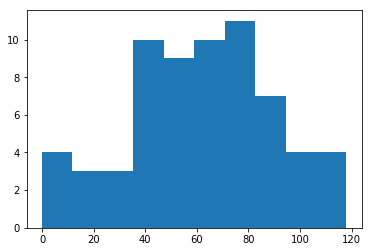

In [26]:
plt.hist(to_fill)
plt.show()

By default, matplotlib picks a color, and creates ticks and labels as shown. What if I want the blue to actually be red? And semi transparent? We can do that:

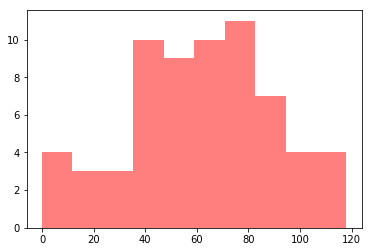

In [27]:
plt.hist(to_fill,color="r",alpha=0.5)
plt.show()

It's hard to see because there's nothing behind it, but we now have a semi-transparent red plot. Now, looking, we have by default created 10 bins. We can create more or less:

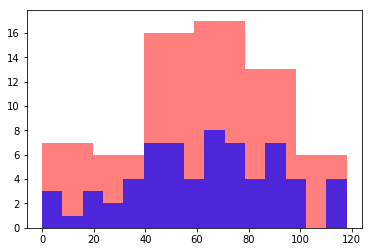

In [28]:
plt.hist(to_fill,bins=6,color='r',alpha=0.5)
plt.hist(to_fill,bins=15,color='b',alpha=0.7)
plt.show()

We can see that by decreasing the number of bins, more students appear in each bin. By increasing the number of bins, the opposite effect occurs. Often, we want to normalize histograms:

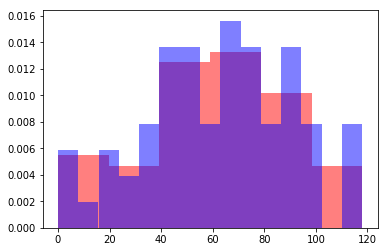

In [29]:
plt.hist(to_fill,bins=6,color='r',alpha=0.5,normed=True)
plt.hist(to_fill,bins=15,color='b',alpha=0.5,normed=True)
plt.show()

By normalizing, we can see the distributions overlaid on each other. It seems to me like the default of 10 was a decent number of bins. Let's try 9, un-normalize, and then add some labels:  

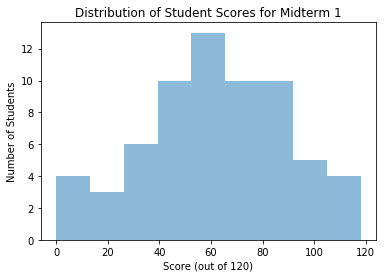

In [30]:
plt.hist(to_fill,bins=9,alpha=0.5)
plt.xlabel('Score (out of 120)')
plt.ylabel('Number of Students')
plt.title('Distribution of Student Scores for Midterm 1')
plt.show()

Often we are interested in knowing the percentiles of a distribution — the standard in statistics is the 16th, 50th, and 84th percentile. You can calculate these easily with np.percentile(array_like,#), where # is the percentile you want to calculate. 

I'll tell you that the function plt.axvline(value,ls='--',color='k') will plot a vertical black dashed line at a certain x-axis value "value". In the block below, reproduce the plot in the cell above, but with the standard percentile spots demarcated by vertical dashed lines. 

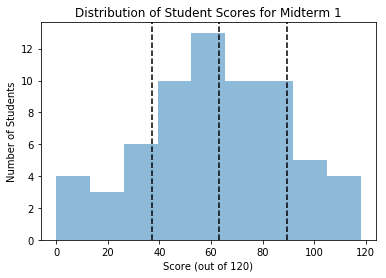

In [31]:
#code here -- should reproduce the plot below when run.

Great. That gives us a pretty easy way of assigning grades — we can go D, C, B, A in the four categories created, or we can set the whole middle region to B, A above the 84th percentile, and C below the 16th percentile (if we are nice). 

Let's get a little bit fancier. I want to write a function that will compare the scores of any number of students, given a list of names. It should taken in the names as strings, and then create a horizontal bar plot showing their respective scores, with their names on the y axis. Why horizontal? Think about it — the score is always out of 120, and the width of our computer screen is fixed, while the number of names we enter is variable, and our computer can scroll to accomodate any reasonable height. This way, our names won't get squished trying to fit everything in. 

**Step One** A function that can take in different numbers of arguments. 
Take a look at the following:

In [32]:
def a_function(arg1,arg2):
    computation = arg1 + arg2
    return computation

I can run the above and feed it two numbers:

In [33]:
a_function(1,5)

6

And you can see it did the computation and returned it. But what if I want to add three numbers?

In [34]:
a_function(1,5,6)

TypeError: a_function() takes exactly 2 arguments (3 given)

What we get here is a "TypeError." It's raised because our function was specified to take exactly 2 arguments (arg1 and arg2), but we gave it three. Shoutout to python's error message actually being helpful. OK, so how do we fix this? 

Here's one way:

In [35]:
def new_func(array_like):
    out_sum = 0
    for i in array_like:
        out_sum += i
    return out_sum

What I've done is force the user to enter a list of numbers, then iterated through and added them all up. (Yes, I could've just run np.sum() on the array_like, but what's the fun in that?). But that's just a workaround — sometimes, we need the function to take a truly variable number of inputs. 

That's where **args** and **kwargs** come in. Check this out:

In [41]:
def sum_func(arg1,arg2,*args):
    out_sum = arg1+arg2
    for i in args:
        out_sum +=i 
    return out_sum

What's going on? Let's test the function a bit:

In [42]:
sum_func(1,2)

3

In [43]:
sum_func(1,2,3)

6

In [44]:
sum_func(1,2,3,4,5)

15

By specifying \*args as the final input to the function, we told python "allow any extra arguments to be entered into this function, and store them in a list called args." Then, we calculated the first sum (the one that is required), and went through any extra numbers that might've been entered and added them in as well. 

There is a slightly different version of this that applies to a "dictionary" style way of doing things. See below:

In [45]:
def dict_funct(arg1,arg2,**kwargs):
    output_dict = {}
    output_dict[arg1] = arg2
    for i in kwargs.keys():
        output_dict[i] = kwargs[i]
    return output_dict

What I've done is made a function that takes 2 things, and puts them in a dictionary where the first argument is a key and the second is a value (for illustration). Watch:

In [46]:
one = dict_funct('key1',5)
one

{'key1': 5}

In [47]:
two = dict_funct('key1',5,key2=6)
two

{'key1': 5, 'key2': 6}

In short, \*\*kwargs tells python "allow the user to add extra variables to this function, but they have to be of the form a=b, and store those extra variables in a dictionary where each a is a key and each b is a value." 

Sometimes, args and kwargs are most useful not even because you want to use the extra optional arguments in a function, but because you want your intermediary function to allow anything to get dumped into it, and just return it and pass it all along to the next function in your program. 

OK. Back to our students. We want to compare at least a minimum of two students, and the ability to add in as many extra as we want. Our basic skeleton then will look something like

In [49]:
def compare_students(student1,student2,*args):
    "some code here"
    return

Now, let's practice making the bar plot. We'll be using plt.hbar(), which can take a list of strings (names) and corresponding list of values (scores), and make a bar plot (horizontal). See:

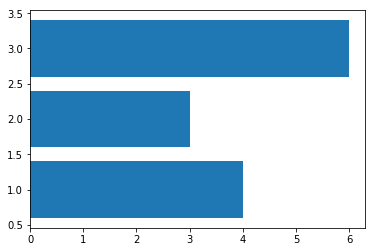

In [54]:
plt.barh([1,2,3],[4,3,6])
plt.show()

Now, we want the 1,2,3 to actually be the names of students. So I can manually set the tick labels for the plot as follows: 


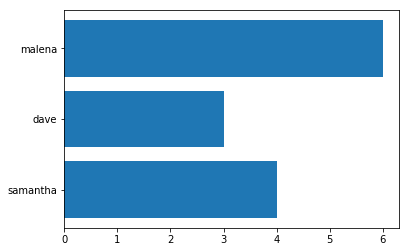

In [55]:
tick_labels = ('samantha','dave','malena')
plt.barh([1,2,3],[4,3,6])
plt.yticks([1,2,3],tick_labels)
plt.show()

Cool! We're basically ready to go here. Using what I've illustrated above, make a function which takes any number of students in our sample above as strings, and makes the plot of their scores. It's up to you which way you chose to index out the student's scores, but the fastest way will be by invoking the class_dictionary we made above. Throw a title an axis labels on there while you're at it. Then test it out on first 2 students, then 3.

In [61]:
#code here

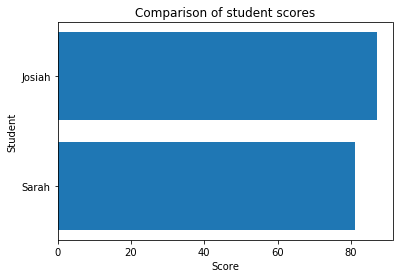

In [57]:
#Try running your function with this block, and seeing if you get the plot below.
compare_students('Sarah','Josiah')

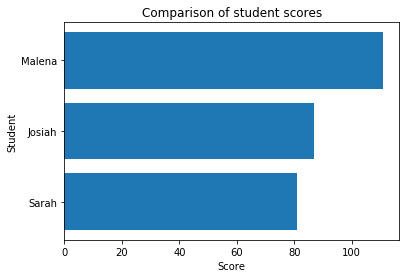

In [60]:
compare_students('Sarah','Josiah','Malena')

There might be some nomenclature that's a bit unfamiliar to you in the way I designed my function, if you check my solutions, though you should have been able to accomplish what was needed using for loops and things we've learned so far. But to clue you in, I utilized two basic Python behaviors to accomplish my task in fewer lines: List addition, and list comprehension. 

List addition is simply the fact that to combine two lists into one, just add them:

In [62]:
[1,2,4] + [4,5,6]

[1, 2, 4, 4, 5, 6]

Thus, if you have a list, and two separate values (the way you probably did when args is a list of names, but you have two strings of names floating around outside, you can make a consolidated list by putting the two floating strings into their own list and adding them to the rest. In my example, 

\[student1\] + \[student2\] + args

has the same effect as

\[student1,student2\] + args would have.

The other thing I did was a list comprehension. Watch the following:

In [63]:
empty_list = []
for i in range(10):
    empty_list.append(i*2)
empty_list

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

I used a for-loop to fill an empty list with the values of range(10) each times two. I can also use the following:

In [64]:
full_list = [i*2 for i in range(10)]
full_list

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

Essentially, I compress the for-loop iteration into 1 line. Python knows I mean "create a list with values that are i\*2 for each i in range(10)". I can do this in many situations, which saves me space in my code, and is often faster computationally as well. 

**Better Function Writing** 

Let's take a few steps to make my comparison function better. The first thing we want to do is add *documentation*. This tells people out to use the function. Usually, documention looks something like this:

In [65]:
def compare_students(student1,student2,*args):
    '''
    A function to produce a horizontal bar plot comparing the midterm scores of students
    INPUTS:
        student1 (string): the name of a student in the class_dictionary
        student2 (string): the name of a student in the class_dictionary
        *args (optional, string): any number of students from the class_dictionary
    PRODUCES: 
        A bar plot 
    RETURNS: 
        NONE
    '''
    #Code goes here (not to spoil the above exercise!)
    return

Now, if someone is looking at our code, they can easily figure out that they need, for example, to have a dictionary called "class_dictionary" defined in their code for this function to work. Actually, the fact that my function requires that is bad, we'll get to that in a minute. If someone were using our code but not actually looking at the text file, they could type:

In [66]:
help(compare_students)

Help on function compare_students in module __main__:

compare_students(student1, student2, *args)
    A function to produce a horizontal bar plot comparing the midterm scores of students
    INPUTS:
        student1 (string): the name of a student in the class_dictionary
        student2 (string): the name of a student in the class_dictionary
        *args (optional, string): any number of students from the class_dictionary
    PRODUCES: 
        A bar plot 
    RETURNS: 
        NONE



And our documentation for it would pop up in their terminal, making it easy for them to make sure they are using it properly. 

Back to what I said about the class dictionary. Inside my function, I index class_dictionary to get the scores for individual students out. But what if class_dictionary wasn't defined in my code? My function couldn't run. If I copied and pasted my function into another file, it wouldn't run by default. In short, it's not **general**. It's best to make your code as reasonably generalizable as possible — it will help you re-use your own code later, and catch bugs. I can make my function more generalizable by requiring the user to *provide* a class_dictionary to the function. That truly isolates it, and means I can move it from file to file or know that my tests of it aren't importing problems from elsewhere in my code. 

But what if I don't want to manually type "class_dictionary" into my code when I run it, since, at least, in this file, I only have 1 commonly defined one? Check this out:

In [67]:
def compare_students(student1,student2,class_dict=class_dictionary,*args):
    '''
    A function to produce a horizontal bar plot comparing the midterm scores of students
    INPUTS:
        student1 (string): the name of a student in the class_dictionary
        student2 (string): the name of a student in the class_dictionary
        *args (optional, string): any number of students from the class_dictionary
    PRODUCES: 
        A bar plot 
    RETURNS: 
        NONE
    '''
    #Code goes here!
    return

What I've done is added a new required argument to my function (I named it class_dict to avoid confusion with class_dictionary). But in the function call itself, I set the input of class_dict equal to the class_dictionary I have sitting in my code. **Note:** pre-set or "default" arguments in functions must be defined *after* all the required, undefault ones (I couldn't put class_dict=class_dictionary before student1 and student2. 

This is a reasonable compromise for my code — I don't have to type 
compare_students('name','name2',class_dictionary,'other_name')

every time— I can use my function as normal. BUT, if I move my function to another code file, it's clear that I need to manually enter a new dictionary, or set one named class_dictionary outside my function in my code for it to work. 

As a final edition, I'll update the documentation to include the parameters imposed on the input dictionary. But I'll also make it the most general (not set a default), and move class_dict to the front of the required arguments (just for the aesthetic of giving a dictionary, then as many names as you want (min 2), rather than 2 names, a dictionary, and then more names. 

In [68]:
def compare_students(class_dict,student1,student2,*args):
    '''
    A function to produce a horizontal bar plot comparing the midterm scores of students
    INPUTS:
        class_dict (dict): A dictionary containing student names and exam scores of the form {'name' (str): score (float)}
        student1 (string): the name of a student in the class_dictionary
        student2 (string): the name of a student in the class_dictionary
        *args (optional, string): any number of students from the class_dictionary
    PRODUCES: 
        A bar plot 
    RETURNS: 
        NONE
    '''
    #Code here
    return

**ON YOUR OWN**

Here's a couple of exercises to play around with this function to make it EVEN MORE general, which you should be able to do with some quick googling. 

1. The string matching from argument to dictionary key is exact — the user can't enter 'malena' if the key was 'Malena'. The best way around this might be to coerce all the strings to be all lower or upper case in the dictionary, and then coerce the user input to the function to be the same case (upper or lower) before attempting to query the dictionary. Look up how to make strings upper or lower case, and implement that in your function. Don't necessarily go out and change how we created the dictionary in the first place, /within/ your function, update all the names in the dict to meet this need. 
2. What if someone enters a name in your function that, once problem 1 above is accomplished, isn't in the dictionary (not in class, or misspelled). As of now, your function will stop and throw a "key error", and say that the name is not in the dictionary. For the sake of exercise, let's change that behavior, and ignore it if a name isn't included moving on to all the other names and still producing the plot. Update your function such that if a name isn't in the dictionary, it prints a warning "Warning, ___ wasn't in the class dict, continuing..." so the user knows, but then still plots the rest of the (working) names. You could do this with an if-statement before actually querying the dict, or if you're adventurous, look up "try and except statements" online. 
3. Look around plt.barh's documentation, and see if you can make your plot do the highest scorer in a different color than the rest. Note, the easiest way might be to go through once plotting all in one color, and plotting the new color for the top score bar on top of it. 


Alright! That's it for this tutorial. As always, I hope it was helpful to you. If you have any questions about it (or find typos), or a question about your own code as you're getting started, feel free to email me! I welcome all kinds of feedback. I hope to have a few more very-entry-level tutorials up soon, so stay tuned!